In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [244]:
sample_data = pd.read_excel('./assets/sample_data.xlsx', sheet_name="set_2")
# set_1 set_2 set_3 set_4

In [245]:
## is data discrete or continuous?
i = 0
num_col = len(sample_data.columns) - 1
flag_conti = True
while i < num_col:
    if (sample_data[i+1]%1 == 0).all():
        flag_conti = False
    i+=1
if flag_conti:
    print("Data is continuous")
    ## is there more than one data per subgroup?
    flag_subgroup = False
    num_col = len(sample_data.columns) - 1
    if num_col > 1 :
        flag_subgroup = True
        if num_col > 10:
            print("Data will use 'X bar & S chart'")
        else:
            print("Data will use 'X bar & R chart'")
    else:
        print("Data will use 'XmR chart'")
else:
    print("Data is discrete")
    ## does data follow Poisson distribution or Binomial 
    flag_poisson = False
    mean = round(sample_data[1].mean(),0)
    var = round((sample_data[1].var()),0)
    if(mean == var):
        flag_poisson = True
        print("Data will use either 'C chart' or 'U chart'") ##left differentiation
    else:
        print("Data will use 'P chart'")

Data is discrete
Data will use 'P chart'


In [230]:
## now that we know what chart to use for what type of data, let's create the respective charts

X bar Chart:
Process is in Control


,amount,Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8
index,,,,,,,,,
1,21.6,0,0,0,0,0,0,0,0
2,19.8,0,0,0,0,0,0,0,0
3,20.4,0,0,0,0,0,0,0,0
4,21.0,0,0,0,0,0,0,0,0
5,21.6,0,0,0,0,0,0,0,0
6,19.4,0,0,0,0,0,0,0,0
7,19.0,0,0,0,0,0,0,0,0
8,20.4,0,0,0,0,0,0,0,0
9,22.0,0,0,0,0,0,0,0,0


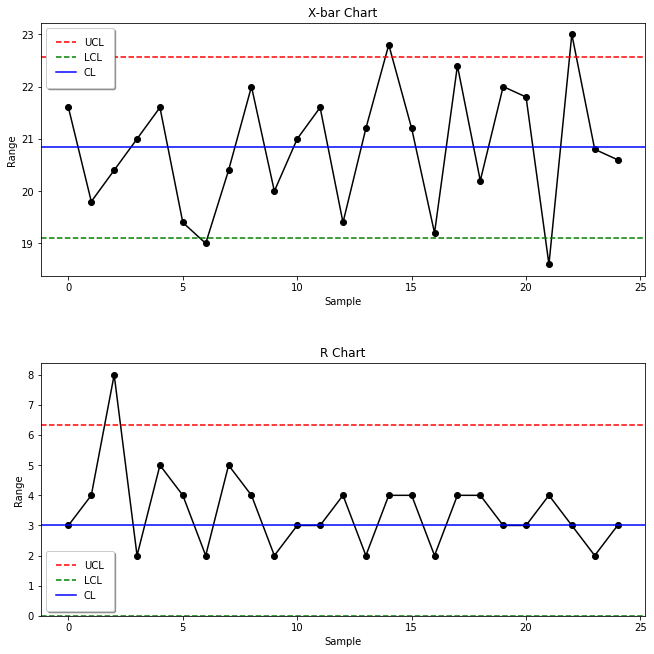

In [249]:
## for x bar & r chart

x = np.array(sample_data.iloc[:,1:].to_numpy())  
## Define list variable for groups means
x_bar = []
## Define list variable for groups ranges
r = [] 
## Get and append groups means and ranges
for group in x:
    x_bar.append(round(group.mean(),3))
    r.append(round(group.max() - group.min(),3))
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(10,10))

## select appropriate constant value
constants = pd.read_excel('./assets/control_charts_constants.xlsx', sheet_name="Sheet1")
sample_size = len(sample_data.columns) - 1
A2 = constants.loc[constants['m'] == sample_size]['A2']
A2 = float(A2)
D4 = constants.loc[constants['m'] == sample_size]['D4']
D4 = float(D4)
D3 = constants.loc[constants['m'] == sample_size]['D3']
D3 = float(D3)

sigma = np.std(x_bar)
## x-bar chart
# axs[0].plot(x_bar, linestyle='-', marker='o', markersize=10, color='black', linewidth=2)
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed', label='UCL')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='green', linestyle='dashed', label='LCL')
axs[0].axhline((statistics.mean(x_bar)), color='blue', label='CL')
axs[0].set_title('X-bar Chart')
axs[0].set(xlabel='Sample', ylabel='Range')
axs[0].legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)

## R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed', label='UCL')
axs[1].axhline((D3*statistics.mean(r)), color='green', linestyle='dashed', label='LCL')
axs[1].axhline((statistics.mean(r)), color='blue', label='CL')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Sample', ylabel='Range')
axs[1].legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)

fig.tight_layout(pad=4)

print("X bar Chart:")
mean = np.mean(x_bar)
sigma = np.std(x_bar)
new_df = pd.DataFrame(columns=['index','amount'])
new_df['amount']=x_bar
new_df['index'] = range(1,len(new_df['amount'])+1)
new_df = new_df.set_index('index')
# from detector import AnomalyDetector
detector = AnomalyDetector()
detector.rule1(new_df,mean,sigma)
detector.rule2(new_df, mean)
detector.rule3(new_df)
detector.rule4(new_df)
detector.rule5(new_df, mean, sigma)
detector.rule6(new_df, mean, sigma)
detector.rule7(new_df, mean, sigma)
detector.rule8(new_df, mean, sigma)
control_check=False
for x in new_df.any(axis=1) :
    if x==False :
        control_check=True
        break
if control_check==False :
    print("Process is in Control")
else :
    print("Process is Out of Control")
new_df
# print("R Chart")
# mean = np.mean(r)
# sigma = np.std(r)
# new_df = pd.DataFrame(columns=['index','amount'])
# new_df['amount']=r
# new_df['index'] = range(1,len(new_df['amount'])+1)
# new_df = new_df.set_index('index')
# from detector import AnomalyDetector
# detector = AnomalyDetector()
# detector.rule1(new_df,mean,sigma)
# detector.rule2(new_df, mean)
# detector.rule3(new_df)
# detector.rule4(new_df)
# detector.rule5(new_df, mean, sigma)
# detector.rule6(new_df, mean, sigma)
# detector.rule7(new_df, mean, sigma)
# detector.rule8(new_df, mean, sigma)

# control_check=False
# for x in new_df.any(axis=1) :
#     if x==False :
#         control_check=True
#         break
# if control_check==False :
#     print("Process is in Control")
# else :
#     print("Process is Out of Control")

X bar Chart:
Process is in Control
S Chart
Process is in Control


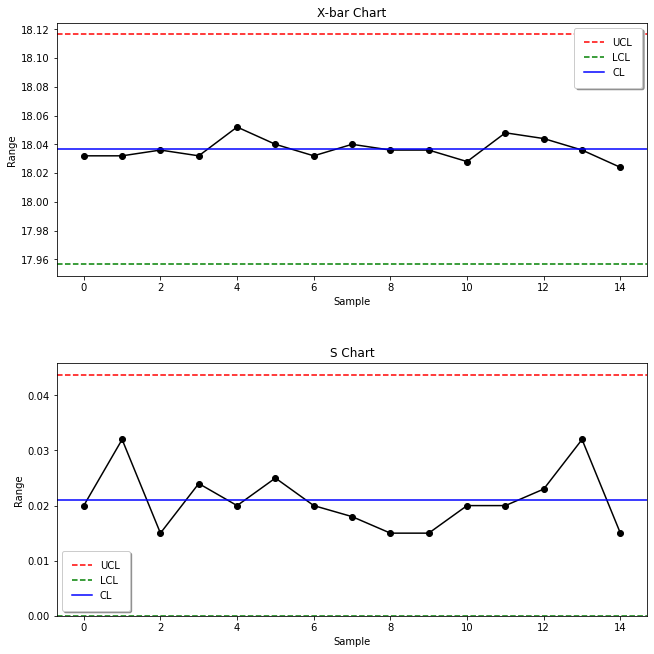

In [226]:
## x bar and S chart

x = np.array(sample_data.iloc[:,1:].to_numpy())  
## Define list variable for groups means
x_bar = []
## Define list variable for groups ranges
s = [] 
## Get and append groups means and ranges
for group in x:
    x_bar.append(round(group.mean(),3))
    s.append(round(group.std(),3))
## Plot x-bar and S charts
fig, axs = plt.subplots(2, figsize=(10,10))

## select appropriate constant value
constants = pd.read_excel('./assets/control_charts_constants.xlsx', sheet_name="Sheet1")
sample_size = len(sample_data.columns) - 1
A3 = constants.loc[constants['m'] == sample_size]['A3']
A3 = float(A3)
B4 = constants.loc[constants['m'] == sample_size]['B4']
B4 = float(B4)
B3 = constants.loc[constants['m'] == sample_size]['B3']
B3 = float(B3)

## x-bar chart
# axs[0].plot(x_bar, linestyle='-', marker='o', markersize=10, color='black', linewidth=2)
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A3*statistics.mean(r)), color='red', linestyle='dashed', label='UCL')
axs[0].axhline((statistics.mean(x_bar)-A3*statistics.mean(r)), color='green', linestyle='dashed', label='LCL')
axs[0].axhline((statistics.mean(x_bar)), color='blue', label='CL')
axs[0].set_title('X-bar Chart')
axs[0].set(xlabel='Sample', ylabel='Range')
axs[0].legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)

## S chart
axs[1].plot(s, linestyle='-', marker='o', color='black')
axs[1].axhline((B4*statistics.mean(s)), color='red', linestyle='dashed', label='UCL')
axs[1].axhline((B3*statistics.mean(s)), color='green', linestyle='dashed', label='LCL')
axs[1].axhline((statistics.mean(s)), color='blue', label='CL')
axs[1].set_ylim(bottom=0)
axs[1].set_title('S Chart')
axs[1].set(xlabel='Sample', ylabel='Range')
axs[1].legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)

fig.tight_layout(pad=4)

print("X bar Chart:")
mean = np.mean(x_bar)
sigma = np.std(x_bar)
new_df = pd.DataFrame(columns=['index','amount'])
new_df['amount']=x_bar
new_df['index'] = range(1,len(new_df['amount'])+1)
new_df = new_df.set_index('index')
from detector import AnomalyDetector
detector = AnomalyDetector()
detector.rule1(new_df,mean,sigma)
detector.rule2(new_df, mean)
detector.rule3(new_df)
detector.rule4(new_df)
detector.rule5(new_df, mean, sigma)
detector.rule6(new_df, mean, sigma)
detector.rule7(new_df, mean, sigma)
detector.rule8(new_df, mean, sigma)

control_check=False
for x in new_df.any(axis=1) :
    if x==False :
        control_check=True
        break
if control_check==False :
    print("Process is in Control")
else :
    print("Process is Out of Control")

print("S Chart")
mean = np.mean(s)
sigma = np.std(s)
new_df = pd.DataFrame(columns=['index','amount'])
new_df['amount']=s
new_df['index'] = range(1,len(new_df['amount'])+1)
new_df = new_df.set_index('index')
from detector import AnomalyDetector
detector = AnomalyDetector()
detector.rule1(new_df,mean,sigma)
detector.rule2(new_df, mean)
detector.rule3(new_df)
detector.rule4(new_df)
detector.rule5(new_df, mean, sigma)
detector.rule6(new_df, mean, sigma)
detector.rule7(new_df, mean, sigma)
detector.rule8(new_df, mean, sigma)

control_check=False
for x in new_df.any(axis=1) :
    if x==False :
        control_check=True
        break
if control_check==False :
    print("Process is in Control")
else :
    print("Process is Out of Control")

C Chart:
Process is in Control


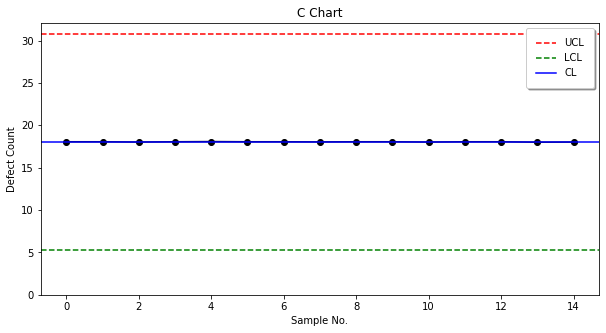

In [227]:
## for c chart

c = sample_data
# Plot c-chart
plt.figure(figsize=(10,5))
plt.plot(c[1], linestyle='-', marker='o', color='black')
plt.axhline(statistics.mean(c[1])+3*np.sqrt(statistics.mean(c[1])), color='red', linestyle='dashed', label='UCL')
plt.axhline(statistics.mean(c[1])-3*np.sqrt(statistics.mean(c[1])), color='green', linestyle='dashed', label='LCL')
plt.axhline(statistics.mean(c[1]), color='blue', label='CL')
plt.ylim(bottom=0)
plt.title('C Chart')
plt.xlabel('Sample No.')
plt.ylabel('Defect Count')
plt.legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)

print("C Chart:")
c = sample_data[1]
mean = np.mean(c)
sigma = np.std(c)
new_df = pd.DataFrame(columns=['index','amount'])
new_df['amount']=c
new_df['index'] = range(1,len(new_df['amount'])+1)
new_df = new_df.set_index('index')
from detector import AnomalyDetector
detector = AnomalyDetector()
detector.rule1(new_df,mean,sigma)
detector.rule2(new_df, mean)
detector.rule3(new_df)
detector.rule4(new_df)
detector.rule5(new_df, mean, sigma)
detector.rule6(new_df, mean, sigma)
detector.rule7(new_df, mean, sigma)
detector.rule8(new_df, mean, sigma)

control_check=False
for x in new_df.any(axis=1) :
    if x==False :
        control_check=True
        break
if control_check==False :
    print("Process is in Control")
else :
    print("Process is Out of Control")

In [248]:
class AnomalyDetector:      

    # Rule 1: One point is more than 3 standard deviations from the mean (outlier)
    def rule1(self, data, mean, sigma):

        def isBetween(value, lower, upper):
            isBetween = value < upper and value > lower
            return 0 if isBetween else 1

        upperLimit = mean + 3 * sigma
        lowerLimit = mean - 3 * sigma

        data['Rule1'] = data.apply(lambda row: isBetween(row['amount'], lowerLimit, upperLimit), axis = 1)

    # Rule 2: Nine (or more) points in a row are on the same side of the mean (shift)
    def rule2(self, data, mean):
        values = [0]*len(data)

        # +1 means upside, -1 means downside
        upsideOrDownside = 0
        count = 0
        for i in range(len(data)):
            amount = data.iloc[i]['amount']
            if amount > mean:
                if upsideOrDownside == 1:
                    count += 1
                else: 
                    upsideOrDownside = 1
                    count = 1
            elif amount < mean: 
                if upsideOrDownside == -1:
                    count += 1
                else: 
                    upsideOrDownside = -1
                    count = 1

            if count >= 9:
                values[i] = 1

        data['Rule2'] = values              

    # Rule 3: Six (or more) points in a row are continually increasing (or decreasing) (trend)
    def rule3(self, data):
        values = [0]*len(data)

        previousAmount = data.iloc[0]['amount']
        # +1 means increasing, -1 means decreasing
        increasingOrDecreasing = 0
        count = 0
        for i in range(1, len(data)):
            amount = data.iloc[i]['amount']
            if amount > previousAmount:
                if increasingOrDecreasing == 1:
                    count += 1
                else:
                    increasingOrDecreasing = 1
                    count = 1
            elif amount < previousAmount:
                if increasingOrDecreasing == -1:
                    count += 1
                else:
                    increasingOrDecreasing = -1
                    count = 1

            if count >= 6:
                values[i] = 1

            previousAmount = amount

        data['Rule3'] = values 

    # Rule 4: Fourteen (or more) points in a row alternate in direction, increasing then decreasing (bimodal, 2 or more factors in data set)
    def rule4(self, data):
        values = [0]*len(data)

        previousAmount = data.iloc[0]['amount']
        # +1 means increasing, -1 means decreasing
        bimodal = 0
        count = 1
        for i in range(1, len(data)):
            amount = data.iloc[i]['amount']
            
            if amount > previousAmount:
                bimodal += 1
                if abs(bimodal) != 1:
                    count = 0
                    bimodal = 0
                else:
                    count += 1
            elif amount < previousAmount:
                bimodal -= 1
                if abs(bimodal) != 1:
                    count = 0
                    bimodal = 0
                else:
                    count += 1

            previousAmount = amount

            if count >= 14:
                values[i] = 1

        data['Rule4'] = values 

    # Rule 5: Two (or three) out of three points in a row are more than 2 standard deviations from the mean in the same direction (shift)
    def rule5(self, data, mean, sigma):
        if len(data) < 3: return

        values = [0]*len(data)
        upperLimit = mean - 2 * sigma
        lowerLimit = mean + 2 * sigma        

        for i in range(len(data) - 3):
            first = data.iloc[i]['amount']
            second = data.iloc[i+1]['amount']
            third = data.iloc[i+2]['amount']
            
            setValue = False
            validCount = 0
            if first > mean and second > mean and third > mean:
                validCount += 1 if first > lowerLimit else 0
                validCount += 1 if second > lowerLimit else 0
                validCount += 1 if third > lowerLimit else 0
                setValue = validCount >= 2
            elif first < mean and second < mean and third < mean:
                validCount += 1 if first < upperLimit else 0
                validCount += 1 if second < upperLimit else 0
                validCount += 1 if third < upperLimit else 0
                setValue = validCount >= 2

            if setValue:
                values[i+2] = 1

        data['Rule5'] = values

    # Rule 6: Four (or five) out of five points in a row are more than 1 standard deviation from the mean in the same direction (shift or trend)
    def rule6(self, data, mean, sigma):
        if len(data) < 5: return

        values = [0]*len(data)
        upperLimit = mean - sigma
        lowerLimit = mean + sigma   

        for i in range(len(data) - 5):
            pVals = list(map(lambda x: data.iloc[x]['amount'], range(i, i+5)))

            setValue = False
            if len(list(filter(lambda x: x > mean, pVals))) == 5:
                setValue = len(list(filter(lambda x: x > lowerLimit, pVals))) >= 4
            elif len(list(filter(lambda x: x < mean, pVals))) == 5:
                setValue = len(list(filter(lambda x: x < upperLimit, pVals))) >= 4

            if setValue:
                values[i+4] = 1

        data['Rule6'] = values

    # Rule 7: Fifteen points in a row are all within 1 standard deviation of the mean on either side of the mean (reduced variation or measurement issue)
    def rule7(self, data, mean, sigma):
        if len(data) < 15: return
        values = [0]*len(data)
        upperLimit = mean + sigma
        lowerLimit = mean - sigma 
        
        for i in range(len(data) - 15):
            setValue = True
            for y in range(15):
                item = data.iloc[i + y]['amount']
                if item >= upperLimit or item <= lowerLimit: 
                    setValue = False
                    break
            
            if setValue:
                values[i+14] = 1

        data['Rule7'] = values

    # Rule 8: Eight points in a row exist with none within 1 standard deviation of the mean and the points are in both directions from the mean (bimodal, 2 or more factors in data set)
    def rule8(self, data, mean, sigma):
        if len(data) < 8: return
        values = [0]*len(data)

        for i in range(len(data) - 8):
            setValue = True
            for y in range(8):
                item = data.iloc[i + y]['amount']
                if abs(mean - item) < sigma:
                    setValue = False
                    break

            if setValue:
                values[i+8] = 1

        data['Rule8'] = values